In [1]:
import sys
import pandas as pd
import numpy as np

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from evaluation import evaluation_func as fp_eval

from collections import OrderedDict

In [2]:
color_dict = OrderedDict()

color_dict["Methods"] = OrderedDict({
    "FedProt":"black",
    "Fisher":"#D44400",
    "Stouffer":"#E69F00",
    "REM":"#2E5EAA",
    "RankProd":"#009E73"
})

# Read results

In [3]:
dfs = {}

workdir = "/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/balanced/results" 
df = fp_eval.read_results(workdir,
                          deqms_name="/central_res.tsv",
                          fedprot_name="/DPE.csv")
dfs["Bacterial dataset"] = df
print(f"Proteins: {len(df)}")


workdir = "/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/01_smaller_lib_balanced_PG_MajorPG/results" 
df = fp_eval.read_results(workdir,
                          deqms_name="/central_res.tsv",
                          fedprot_name="/DPE.csv")
dfs["Human serum dataset"] = df
print(f"Proteins: {len(df)}")

Results loaded for DEqMS with 2831 proteins.
Results loaded for FedProt with 2831 proteins.
Results loaded for Fisher with 2824 proteins.
Results loaded for REM with 3023 proteins.
Results loaded for Stouffer with 2238 proteins.
Results loaded for RankProd with 3023 proteins.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/balanced/results with 2238 genes. Adj.p-values were not log-transformed.
Results loaded for DEqMS with 532 proteins.
Results loaded for FedProt with 532 proteins.
Results loaded for Fisher with 432 proteins.
Results loaded for REM with 591 proteins.
Results loaded for Stouffer with 350 proteins.
Results loaded for RankProd with 591 proteins.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/01_smaller_lib_balanced_PG_MajorPG/results with 350 genes. Adj.p-values were not log-transformed.


Proteins: 2238
Proteins: 350


In [4]:
log_dfs = {}
for k in dfs:
    df = dfs[k]
    df = df.replace(0,1e-300)
    df["pv_DEqMS"] = -np.log10(df["pv_DEqMS"])
    for m in ["FedProt", "Fisher","Stouffer","REM","RankProd"]:
        df["pv_"+m] = -np.log10(df["pv_"+m])
    log_dfs[k] = df

# Stats calculation

In [5]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/aggregated_eval"

for dataset in log_dfs:

    pval_basic_stats = fp_eval.calc_stats(
        log_dfs[dataset], 
        lfc_thr=0.58, adj_pval_thr=0.01,
        stats=["MinDiff", "MeanDiff", "MaxDiff", "r", "ρ"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    logfc_basic_stats = fp_eval.calc_stats(
        log_dfs[dataset],
        lfc_thr=0.58, adj_pval_thr=0.01,
        stats=["MinDiff", "MeanDiff", "MaxDiff", "r", "ρ"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="lfc_",
        top_genes=-1
    )

    pval_basic_stats.to_csv(f'{root_dir}/tables/{dataset}_pval_basic_stats.csv')
    logfc_basic_stats.to_csv(f'{root_dir}/tables/{dataset}_logfc_basic_stats.csv')

    print(f'Dataset: {dataset}')
    print("\tLogFC basic stats:")
    print(logfc_basic_stats)
    print("\tP-value basic stats:")
    print(pval_basic_stats)        

Calculating corrs. Using p-vals - log-transformed.
Correlations computed for all genes from pv_ columns.
Correlations computed for all genes from lfc_ columns.
Calculating corrs. Using p-vals - log-transformed.


Dataset: Bacterial dataset
	LogFC basic stats:
               MinDiff      MeanDiff       MaxDiff         r         ρ
FedProt   0.000000e+00  9.814980e-15  5.151435e-14  1.000000  1.000000
Fisher    8.950494e-07  5.749792e-03  1.935080e-01  0.999855  0.999728
Stouffer  8.950494e-07  5.749792e-03  1.935080e-01  0.999855  0.999728
REM       6.878582e-06  1.686182e-02  2.222525e-01  0.999317  0.997940
RankProd  8.950494e-07  5.749792e-03  1.935080e-01  0.999855  0.999728
	P-value basic stats:
           MinDiff      MeanDiff       MaxDiff         r         ρ
FedProt   0.000000  4.426169e-13  3.455014e-12  1.000000  1.000000
Fisher    0.001837  4.003183e+00  2.678062e+01  0.981028  0.955488
Stouffer  0.004098  3.443773e+00  2.499144e+01  0.988485  0.963245
REM       0.000050  1.571957e+01  2.626194e+02  0.763115  0.909137
RankProd  0.000368  1.425206e+01  8.368133e+01  0.774922  0.857192


Correlations computed for all genes from pv_ columns.
Correlations computed for all genes from lfc_ columns.


Dataset: Human serum dataset
	LogFC basic stats:
           MinDiff      MeanDiff       MaxDiff         r         ρ
FedProt   0.000000  9.067570e-15  3.538836e-14  1.000000  1.000000
Fisher    0.000516  9.556746e-03  1.456269e-01  0.998737  0.998393
Stouffer  0.000516  9.556746e-03  1.456269e-01  0.998737  0.998393
REM       0.000095  1.886999e-02  1.334277e-01  0.995878  0.995459
RankProd  0.000516  9.556746e-03  1.456269e-01  0.998737  0.998393
	P-value basic stats:
           MinDiff      MeanDiff       MaxDiff         r         ρ
FedProt   0.000000  1.362955e-13  6.592504e-13  1.000000  1.000000
Fisher    0.010285  4.954327e-01  2.792206e+00  0.963830  0.899454
Stouffer  0.004423  5.702212e-01  2.587273e+00  0.965751  0.868482
REM       0.000241  5.907978e-01  1.163994e+01  0.878908  0.941240
RankProd  0.000254  1.070004e+00  8.978254e+00  0.779143  0.896668


In [6]:
# shorter version of log_dfs taking only 50% of rows randomly
short_log_dfs = {}
for dataset in log_dfs:
    if dataset == "Bacterial dataset":
        short_log_dfs[dataset] = log_dfs[dataset].sample(frac=0.25, random_state=1)
    else:
        short_log_dfs[dataset] = log_dfs[dataset].sample(frac=0.75, random_state=1)
    print(f"Dataset: {dataset}, proteins: {len(short_log_dfs[dataset])}")

Dataset: Bacterial dataset, proteins: 560
Dataset: Human serum dataset, proteins: 262


Plotting corrs using p-vals - log-transformed.


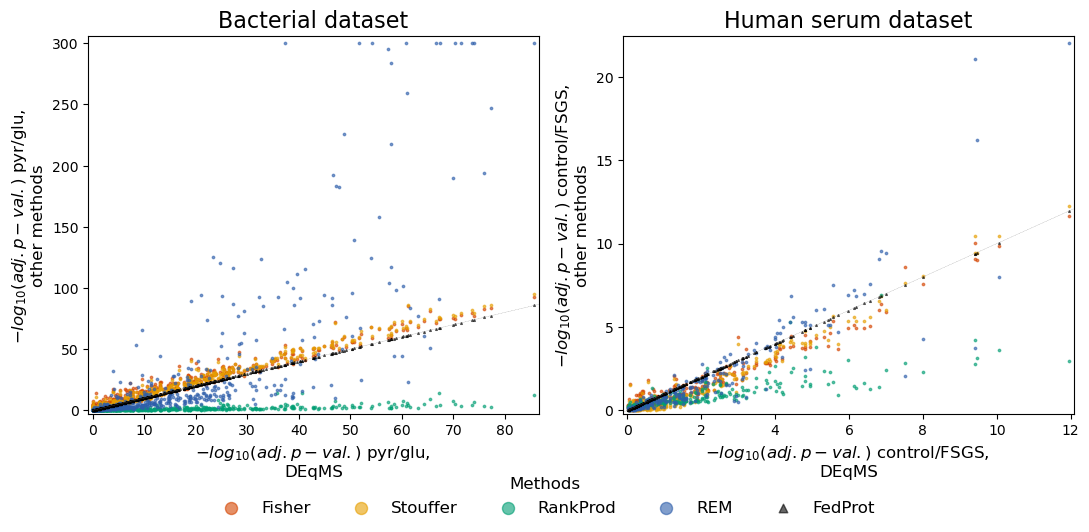

In [7]:
fp_eval.plt_results(
    short_log_dfs, 
    methods=["Fisher", "Stouffer", "RankProd", "REM", "FedProt"],
    color_dict=color_dict,
    what="pv_", 
    text="", dotsize=3,
    datasets=list(log_dfs.keys()),
    figsize=(11,5),
    add_table=False,
    sharex=False, sharey=False,
    comparsions=["pyr/glu", "control/FSGS"]
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

Plotting corrs using logFC values.


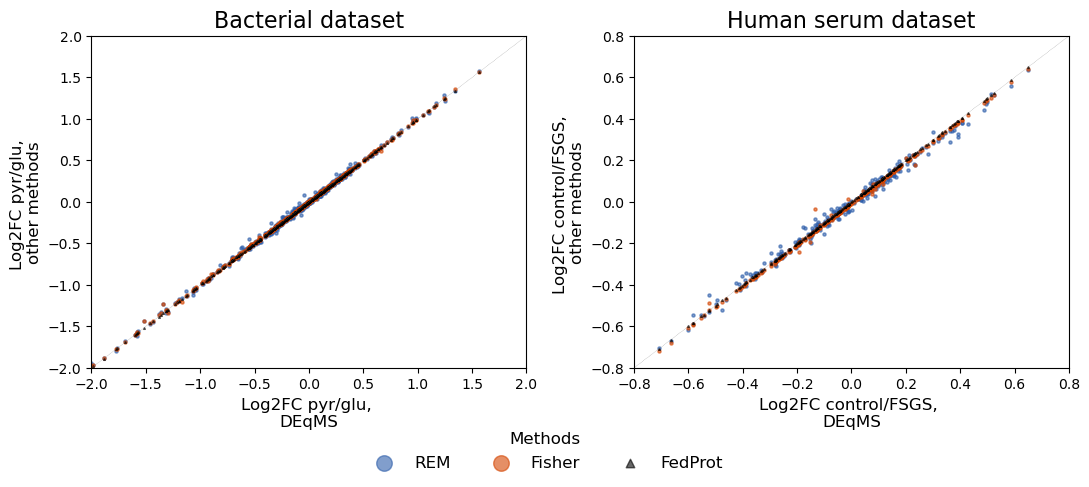

In [15]:
fp_eval.plt_results(
    short_log_dfs, 
    methods=["REM", "Fisher", "FedProt"],
    color_dict=color_dict,
    what="lfc_", 
    text="", dotsize=5,
    datasets=list(log_dfs.keys()),
    add_table=False,
    sharex =False, sharey=False,
    comparsions=["pyr/glu", "control/FSGS"],
    set_lims = [[-2,2], [-0.8, 0.8]]
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

In [14]:
# how many values are above 1.7 or below -1.7 for bacterial dataset
for dataset in log_dfs:
    df = log_dfs[dataset]
    number = 2 if dataset == "Bacterial dataset" else 0.8
    print(f"Dataset: {dataset}")
    for method in ["DEqMS", "FedProt", "Fisher", "Stouffer", "REM", "RankProd"]:
        print(f"\tMethod: {method}")
        print(f"\t\tValues [> {number} or < -{number}]: {len(df[(df['lfc_'+method] > number) | (df['lfc_'+method] < -1 * number)])}")
        # % out of all proteins
        print(f"\t\t% of values : {len(df[(df['lfc_'+method] > number) | (df['lfc_'+method] < -1 * number)])/len(df)*100:.2f}%")

Dataset: Bacterial dataset
	Method: DEqMS
		Values [> 2 or < -2]: 67
		% of values : 2.99%
	Method: FedProt
		Values [> 2 or < -2]: 67
		% of values : 2.99%
	Method: Fisher
		Values [> 2 or < -2]: 67
		% of values : 2.99%
	Method: Stouffer
		Values [> 2 or < -2]: 67
		% of values : 2.99%
	Method: REM
		Values [> 2 or < -2]: 64
		% of values : 2.86%
	Method: RankProd
		Values [> 2 or < -2]: 67
		% of values : 2.99%
Dataset: Human serum dataset
	Method: DEqMS
		Values [> 0.8 or < -0.8]: 3
		% of values : 0.86%
	Method: FedProt
		Values [> 0.8 or < -0.8]: 3
		% of values : 0.86%
	Method: Fisher
		Values [> 0.8 or < -0.8]: 3
		% of values : 0.86%
	Method: Stouffer
		Values [> 0.8 or < -0.8]: 3
		% of values : 0.86%
	Method: REM
		Values [> 0.8 or < -0.8]: 3
		% of values : 0.86%
	Method: RankProd
		Values [> 0.8 or < -0.8]: 3
		% of values : 0.86%


# average expression - methods results

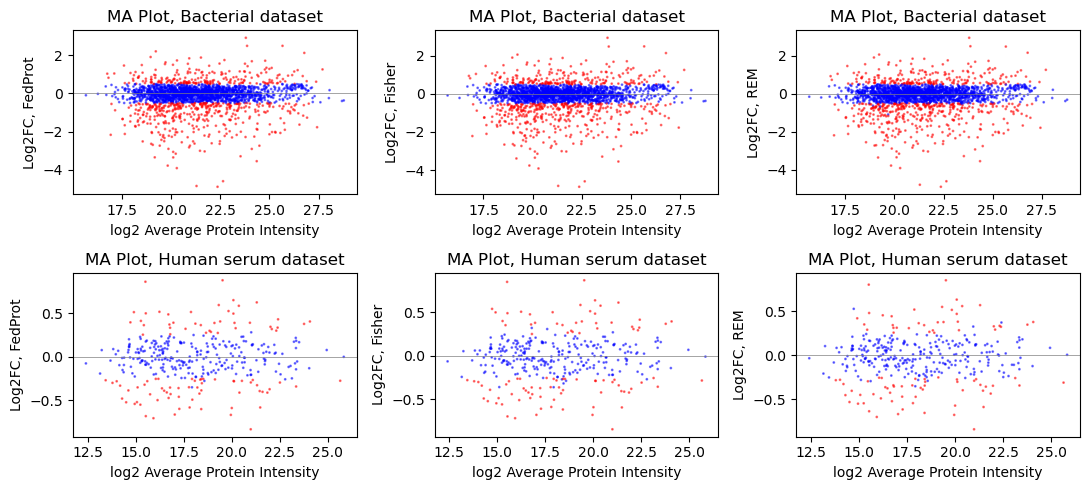

In [23]:
fp_eval.plot_ma_plots(
    log_dfs, 
    what="lfc_", 
    methods=["FedProt", "Fisher", "REM"],
    lfc_thr=[0.5, 0.25], 
    adj_pval_thr=[0.05, 0.05],
    figsize=(11, 5)
)

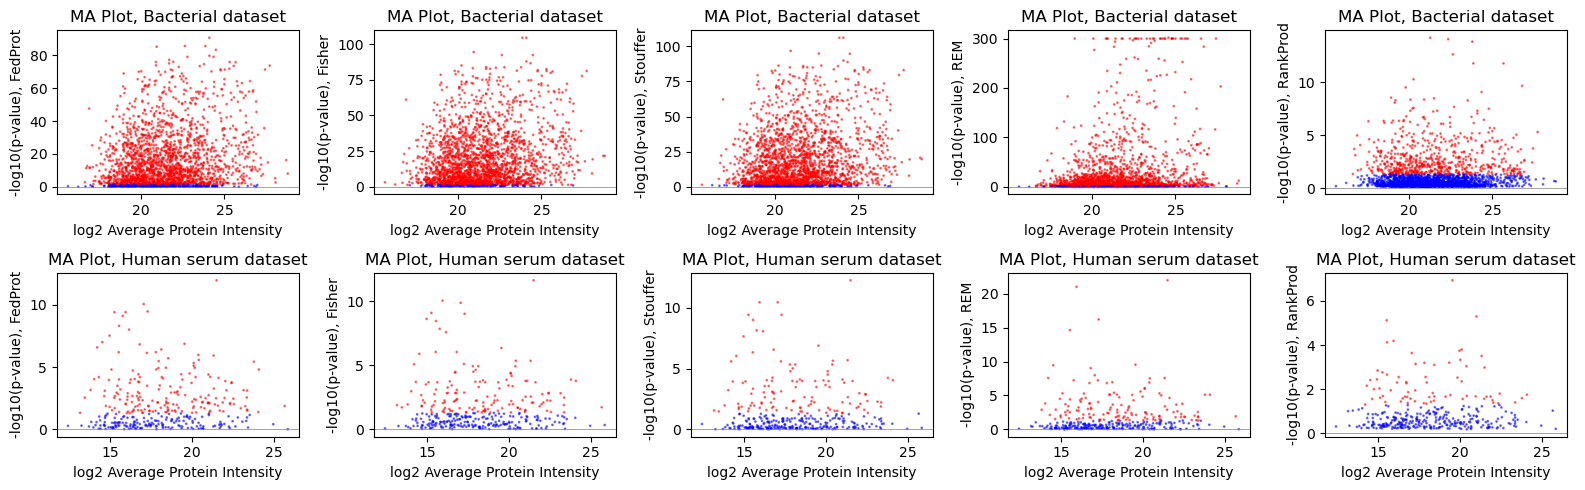

In [24]:
fp_eval.plot_ma_plots(
    log_dfs, 
    what="pv_", 
    methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
    lfc_thr=[0.5, 0.25], 
    adj_pval_thr=[0.05, 0.05],
    figsize=(16, 5)
)

In [25]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def plot_correlation(log_dfs, what="lfc_", methods=["FedProt", "Fisher", "REM"], figsize=(15, 10), figfile=None):
    plot_data = fp_eval.calc_diffs_for_plotting(log_dfs, methods, what)
    
    num_methods = len(methods)
    fig, axes = plt.subplots(len(log_dfs), num_methods, figsize=figsize)
    
    if len(log_dfs) == 1 and num_methods == 1:
        axes = np.array([[axes]])
    elif len(log_dfs) == 1:
        axes = np.array([axes])
    elif num_methods == 1:
        axes = np.array([[ax] for ax in axes])
    
    for i, (dataset_name, dataset) in enumerate(log_dfs.items()):
        for j, method in enumerate(methods):
            ax = axes[i, j]
            x = dataset['AvgExpr_DEqMS']
            y = abs(dataset[f'{what}{method}'] - dataset[f'{what}DEqMS'])
            
            r, _ = pearsonr(x, y)
            
            ax.scatter(x, y, s=1, alpha=0.5)
            ax.set_xlabel('log2 Average Protein Intensity')
            if what == 'lfc_':
                ax.set_ylabel('|log2FC Difference|')
            else:
                ax.set_ylabel('|-log10(adj.p-value) Difference|')
            ax.set_title(f'{dataset_name}\n{method}, Corr r={r:.2f}')
            ax.axhline(0, color='grey', lw=0.5)
    
    plt.tight_layout()
    if figfile:
        fig.savefig(figfile)
    plt.show()



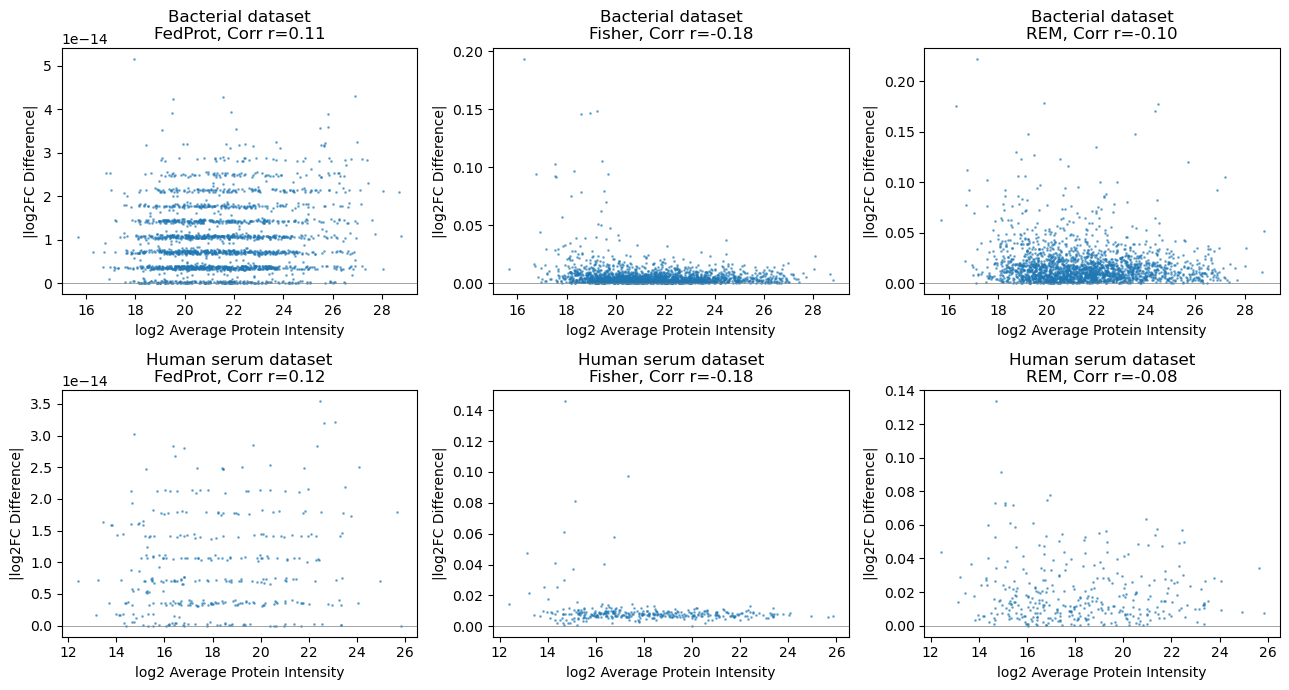

In [26]:

plot_correlation(log_dfs, what="lfc_", methods=["FedProt", "Fisher", "REM"], figsize=(13, 7), figfile=None)

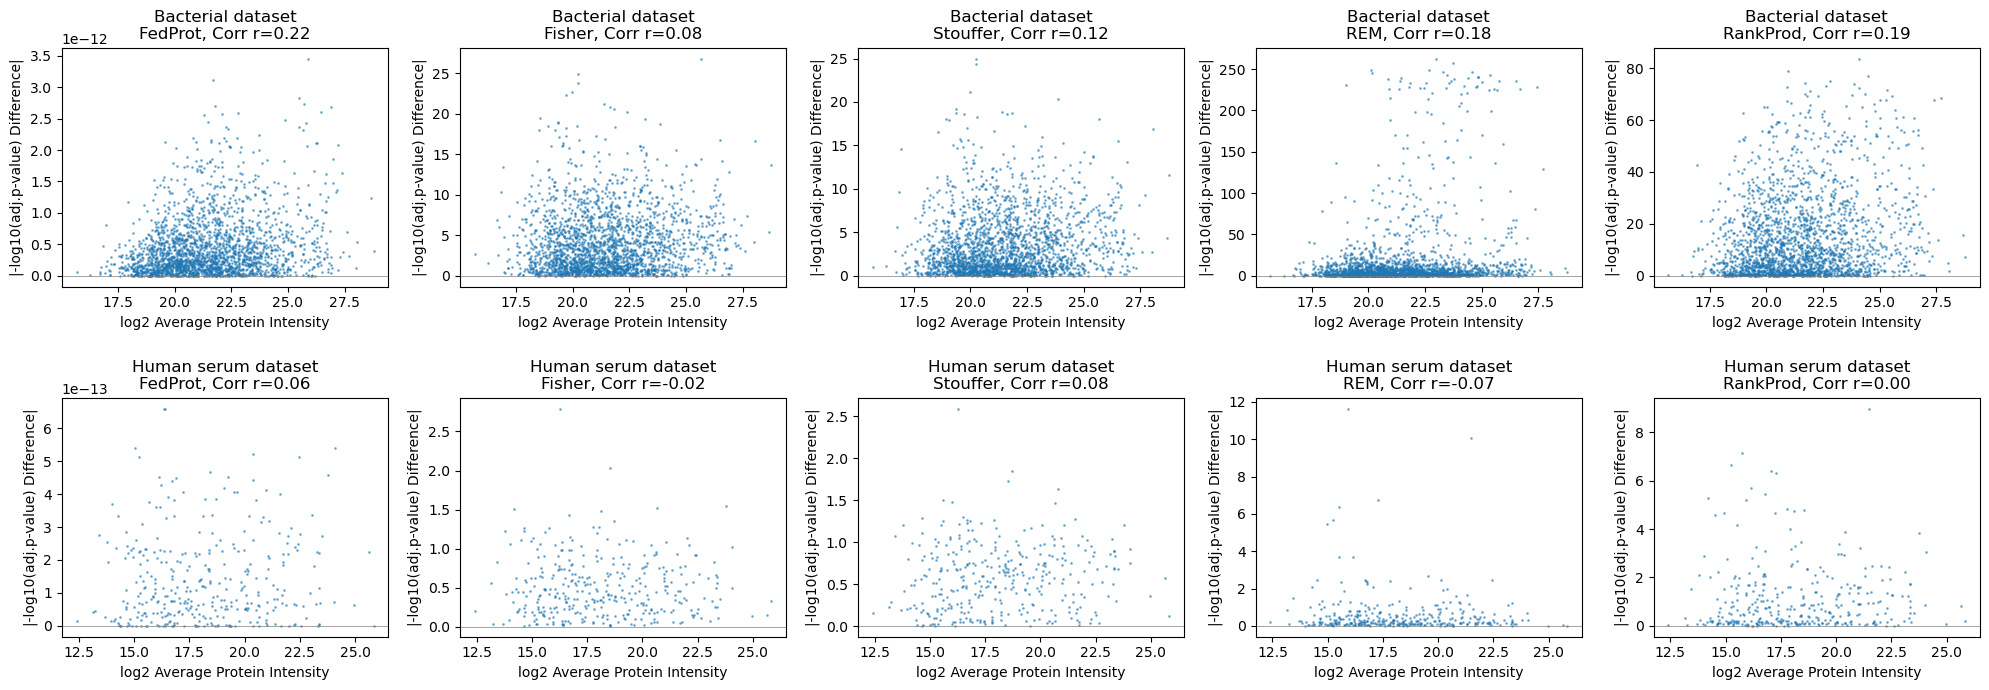

In [27]:
plot_correlation(log_dfs, what="pv_", methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"], figsize=(20, 7), figfile=None)

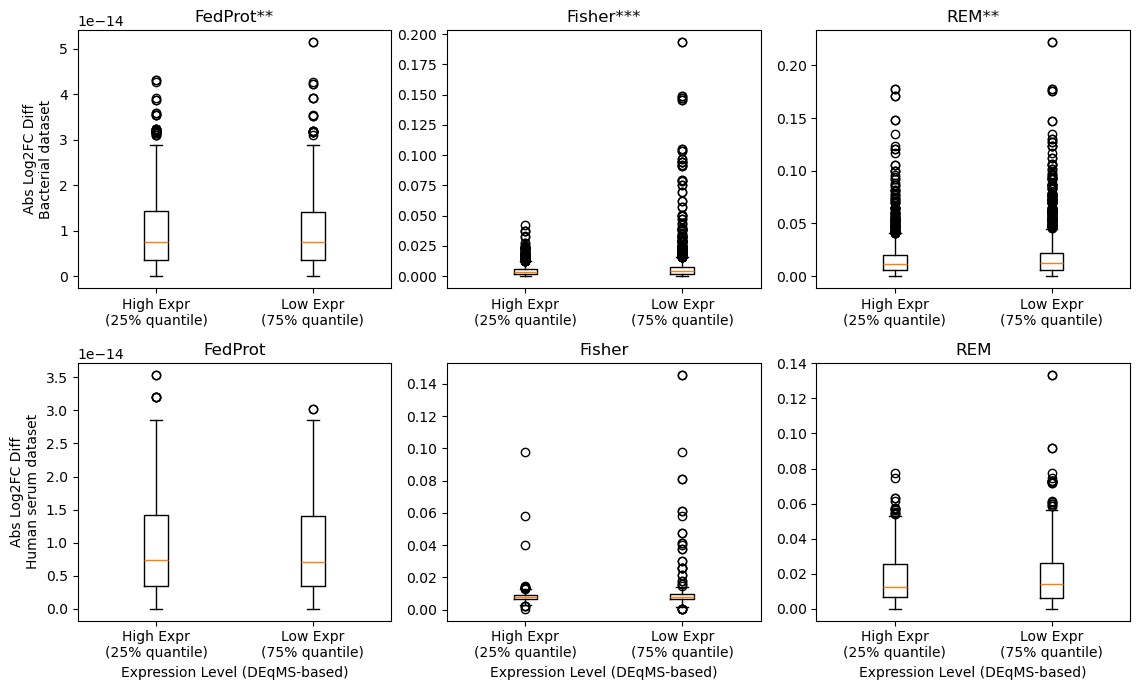

Dataset: Bacterial dataset
Method: FedProt
High expression group has larger mean differences: 1.020868032661932e-14 vs 9.421279074137728e-15
High expression group has larger median differences: 7.494005416219807e-15 vs 7.41073868937292e-15
Effect size: 0.03860217564791942
Dataset: Bacterial dataset
Method: Fisher
Low expression group has larger mean differences: 0.007065302640443246 vs 0.0044342817243755535
Low expression group has larger median differences: 0.003814919406491049 vs 0.0032494425240243013
Effect size: -0.07975754428208245
Dataset: Bacterial dataset
Method: REM
Low expression group has larger mean differences: 0.018249386437646616 vs 0.015474261138663398
Low expression group has larger median differences: 0.012610863356572098 vs 0.011257637050993086
Effect size: -0.04891453041792613


In [28]:
p_values, mean_diffs = fp_eval.plot_exp_diffs(log_dfs, what="lfc_", methods=["FedProt", "Fisher", "REM"], figsize=(11.5, 7))

# Determine which group has larger differences
for significance_level, dataset, method, mean_high, mean_low, median_high, median_low, r in mean_diffs:
    if significance_level == "":
        continue
    print(f"Dataset: {dataset}")
    print(f"Method: {method}")
    if mean_high > mean_low:
        print(f"High expression group has larger mean differences: {mean_high} vs {mean_low}")
    else:
        print(f"Low expression group has larger mean differences: {mean_low} vs {mean_high}")
    if median_high > median_low:
        print(f"High expression group has larger median differences: {median_high} vs {median_low}")
    else:
        print(f"Low expression group has larger median differences: {median_low} vs {median_high}")

    print(f"Effect size: {r}")

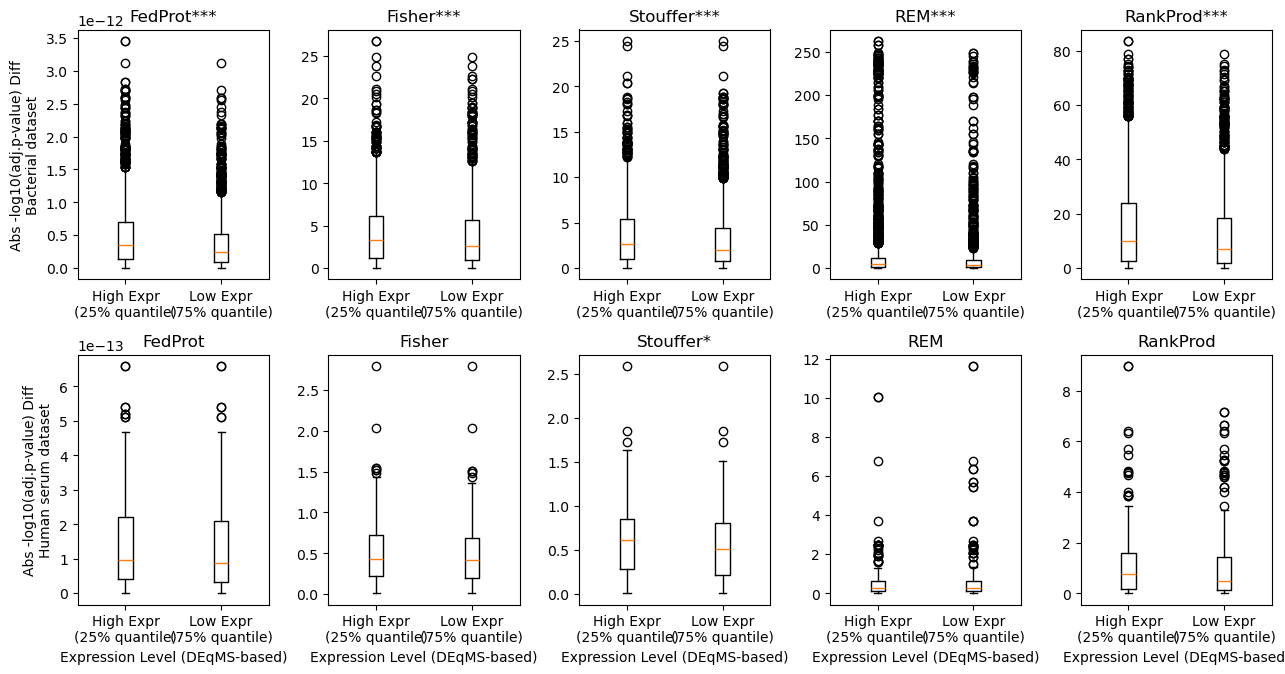

Dataset: Bacterial dataset
Method: FedProt
High expression group has larger mean differences: 5.048927696760861e-13 vs 3.8034108351071217e-13
High expression group has larger median differences: 3.459454944731988e-13 vs 2.4513724383723456e-13
Effect size: 0.13
Dataset: Bacterial dataset
Method: Fisher
High expression group has larger mean differences: 4.180907034091999 vs 3.8254591049911535
High expression group has larger median differences: 3.2833306835680958 vs 2.617545218328325
Effect size: 0.06
Dataset: Bacterial dataset
Method: Stouffer
High expression group has larger mean differences: 3.705490921189137 vs 3.1820545853573887
High expression group has larger median differences: 2.6858731562830607 vs 1.936066851816701
Effect size: 0.09
Dataset: Bacterial dataset
Method: REM
High expression group has larger mean differences: 20.26139025774983 vs 11.177743719644704
High expression group has larger median differences: 4.442442368177666 vs 3.362499991767323
Effect size: 0.08
Dataset: 

In [29]:
p_values, mean_diffs = fp_eval.plot_exp_diffs(log_dfs, what="pv_", methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"], figsize=(13, 7))

# Determine which group has larger differences
for significance_level, dataset, method, mean_high, mean_low, median_high, median_low, r in mean_diffs:
    if significance_level == "":
        continue
    print(f"Dataset: {dataset}")
    print(f"Method: {method}")
    if mean_high > mean_low:
        print(f"High expression group has larger mean differences: {mean_high} vs {mean_low}")
    else:
        print(f"Low expression group has larger mean differences: {mean_low} vs {mean_high}")
    if median_high > median_low:
        print(f"High expression group has larger median differences: {median_high} vs {median_low}")
    else:
        print(f"Low expression group has larger median differences: {median_low} vs {median_high}")

    print(f"Effect size: {round(r, 2)}")

# Top lists

In [30]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/aggregated_eval"

fp_fn_b = fp_eval.calc_stats(
    log_dfs["Bacterial dataset"], 
    lfc_thr=0.5, adj_pval_thr=0.05,
    stats=["FP", "FN", "Jaccard"],
    methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
    column_name="pv_",
    top_genes=-1
)

fp_fn_h = fp_eval.calc_stats(
    log_dfs["Human serum dataset"], 
    lfc_thr=0.25, adj_pval_thr=0.05,
    stats=["FP", "FN", "Jaccard"],
    methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
    column_name="pv_",
    top_genes=-1
)

fp_fn_b.to_csv(f'{root_dir}/tables/Bacterial_FP_FN.csv')
fp_fn_h.to_csv(f'{root_dir}/tables/Human_FP_FN.csv')

print("\tFP/FN bacterial dataset:")
print(fp_fn_b)  
print("\tFP/FN human serum dataset:")
print(fp_fn_h)

Performance metrics calculated for all genes.
Performance metrics calculated for all genes.


	FP/FN bacterial dataset:
           FP     FN   Jaccard
FedProt   0.0    0.0  1.000000
Fisher    3.0    4.0  0.988411
Stouffer  3.0    4.0  0.988411
REM       8.0   15.0  0.962233
RankProd  1.0  111.0  0.813953
	FP/FN human serum dataset:
           FP    FN   Jaccard
FedProt   0.0   0.0  1.000000
Fisher    2.0   6.0  0.922330
Stouffer  2.0  13.0  0.854369
REM       1.0  13.0  0.862745
RankProd  1.0  33.0  0.666667


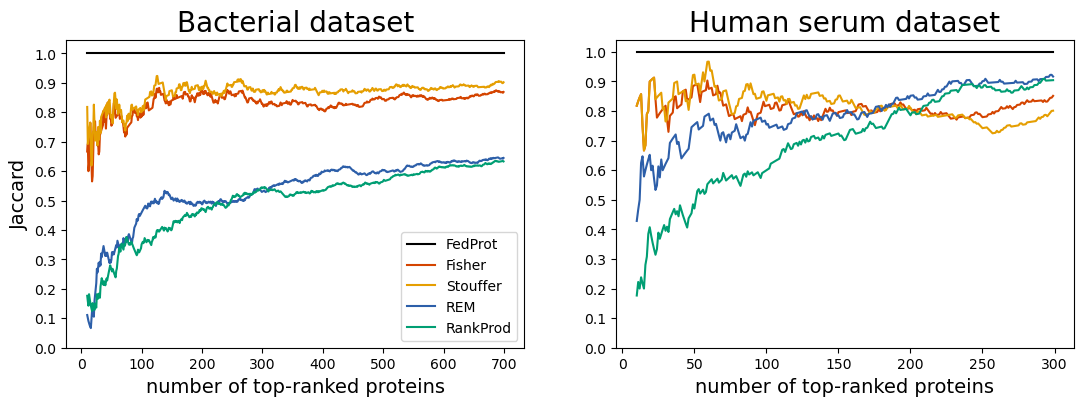

In [16]:
min_n_genes = 10
step = 1

data = fp_eval.plot_stats_for_topN(
    log_dfs,
    datasets = list(log_dfs.keys()),
    methods=["FedProt", "Fisher","Stouffer","REM", "RankProd"],
    metrics=["Jaccard"],
    min_n_genes=min_n_genes,
    max_n_genes=[700, 300],
    step=step,
    color_dict=color_dict,
    sharey=False,
    )

In [32]:
print(f"All data: {log_dfs['Bacterial dataset'].shape[0]}")
# filtet DE genes based on DEqMS
print(f"DE proteins: {log_dfs['Bacterial dataset'][(log_dfs['Bacterial dataset']['pv_DEqMS'] > -np.log(0.05)) & (np.abs(log_dfs['Bacterial dataset']['lfc_DEqMS']) > 0.5)].shape[0]}")

All data: 2238
DE proteins: 601


In [33]:
print(f"All data: {log_dfs['Human serum dataset'].shape[0]}")
# filtet DE genes based on DEqMS
print(f"DE proteins: {log_dfs['Human serum dataset'][(log_dfs['Human serum dataset']['pv_DEqMS'] > -np.log(0.05)) & (np.abs(log_dfs['Human serum dataset']['lfc_DEqMS']) > 0.25)].shape[0]}")

All data: 350
DE proteins: 64
